Logistic Regression to predict EF rating given loss in US dollars,	length (miles), & width (yds)

In [1]:
# Import dependencies
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt 

## Import & Inspect the Data

In [2]:
# Mount to Google Drive (for use with GoogleCoLab)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Loading data
tornadoes_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Tornadoes Machine Learning & Analysis/Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
tornadoes_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,1950,10,1,1950-10-01 21:00:00,OK,40,25,36.7300,-102.5200,36.8800,-102.3000,1,0,0,4000000.0,NaN,15.80,10
1,1950,10,9,1950-10-09 02:15:00,NC,37,47,34.1700,-78.6000,0.0000,0.0000,3,3,0,5000000.0,NaN,2.00,880
2,1950,11,20,1950-11-20 02:20:00,KY,21,177,37.3700,-87.2000,0.0000,0.0000,2,0,0,5000000.0,NaN,0.10,10
3,1950,11,20,1950-11-20 04:00:00,KY,21,209,38.2000,-84.5000,0.0000,0.0000,1,0,0,5000000.0,NaN,0.10,10
4,1950,11,20,1950-11-20 07:30:00,MS,28,101,32.4200,-89.1300,0.0000,0.0000,1,3,0,4000000.0,NaN,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020,9,1,2020-09-01 16:24:00,TN,47,95,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
67020,2020,9,3,2020-09-03 15:57:00,MD,24,3,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
67021,2020,9,5,2020-09-05 16:17:00,CA,6,39,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
67022,2020,9,5,2020-09-05 18:29:00,CA,6,19,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [4]:
# # Load tornado data CSV as a Pandas DataFrame and preview the DataFrame
# file_path = Path('../Cleaned_Data/1950-2020_tornadoes_cleaned.csv')
# tornadoes_df = pd.read_csv(file_path, index_col=0)
# tornadoes_df

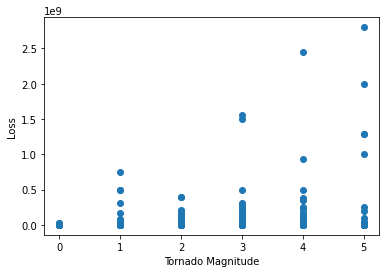

In [5]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Loss' - positive trend
plt.scatter(tornadoes_df.EF, tornadoes_df.Loss) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Loss') 
plt.show()

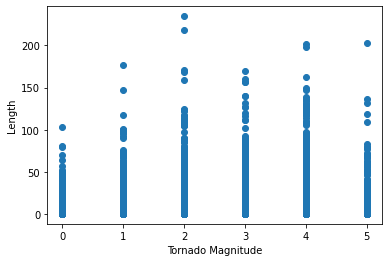

In [6]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Length' - positive trend
plt.scatter(tornadoes_df.EF, tornadoes_df.Length) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Length') 
plt.show()

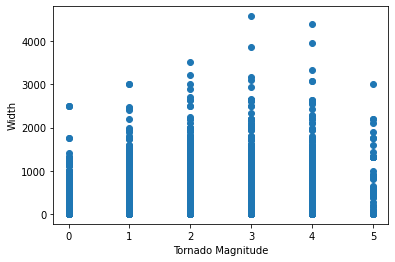

In [7]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Width' - positive trend
plt.scatter(tornadoes_df.EF, tornadoes_df.Width) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Width') 
plt.show()

In [8]:
# drop na columns
tornadoes_df = tornadoes_df.dropna()
tornadoes_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
41903,2000,6,1,2000-06-01 17:06:00,WI,55,27,43.4000,-88.6300,43.3800,-88.3700,2,0,0,1110000.0,400000.0,17.00,120
49035,2006,12,31,2006-12-31 14:45:00,GA,13,93,32.2700,-83.7300,32.2700,-83.7300,2,1,0,150000.0,250000.0,0.46,50
50046,2007,10,18,2007-10-18 17:10:00,KY,21,59,37.8100,-87.0000,37.8900,-86.7700,2,0,0,200000.0,50000.0,13.93,200
50056,2007,10,18,2007-10-18 18:32:00,KY,21,149,37.6200,-87.4800,37.7200,-87.1800,2,4,0,900000.0,200000.0,17.26,360
50070,2007,10,18,2007-10-18 20:03:00,IN,18,19,38.4700,-85.5500,38.5100,-85.4800,3,0,0,1000000.0,10000.0,4.80,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,2020,8,27,2020-08-27 17:45:00,AR,5,147,35.3051,-91.1835,35.3171,-91.2003,0,0,0,20000.0,5000.0,1.26,50
66918,2020,8,29,2020-08-29 15:26:00,NY,36,91,42.9390,-73.7000,42.9380,-73.6950,1,1,0,35000.0,20000.0,0.26,50
66919,2020,8,29,2020-08-29 15:42:00,NY,36,83,42.9160,-73.5950,42.8982,-73.5596,1,0,0,45000.0,30000.0,2.17,100
66971,2020,8,6,2020-08-06 14:02:00,VA,51,15,38.2210,-78.8770,38.2090,-78.8320,0,0,0,150000.0,100000.0,2.58,100


In [15]:
# Format data to meet the requirements of the Scikit-learn library: 
# Will add Loss later
feature_names = ["Length", "Width", "Loss"]
X = tornadoes_df[feature_names]
X


,Length,Width,Loss
41903,17.00,120,1110000.0
49035,0.46,50,150000.0
50046,13.93,200,200000.0
50056,17.26,360,900000.0
50070,4.80,440,1000000.0
...,...,...,...
66897,1.26,50,20000.0
66918,0.26,50,35000.0
66919,2.17,100,45000.0
66971,2.58,100,150000.0


In [11]:
# Assign the target variable - EF
y = tornadoes_df["EF"].ravel()
y[:10]

array([2, 2, 2, 2, 3, 1, 1, 2, 0, 2])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
## Logistic Regression

# Our data is not linear - Reject model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

Accuracy of logistic regression on training 0.4861111111111111
Accuracy of logistic regression on testing 0.48520710059171596
